In [8]:
import pandas as pd
import numpy as np
import json
# 1. Load the dataset (example: US trending videos)
df = pd.read_csv("CAvideos.csv")

# Quick look at the data
print(df.shape)
print(df.info())
print(df.head())


(40881, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bo

In [9]:
# Check missing values
print(df.isnull().sum())

# Fill missing descriptions
df['description'] = df['description'].fillna("No description")


video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
dtype: int64


In [10]:
print("Duplicates before:", df.duplicated().sum())

df = df.drop_duplicates()

print("Duplicates after:", df.duplicated().sum())


Duplicates before: 0
Duplicates after: 0


In [11]:
# Convert trending_date (YY.DD.MM → datetime)
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')

# Convert publish_time to datetime
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# Extract useful parts
df['publish_date'] = df['publish_time'].dt.date
df['publish_hour'] = df['publish_time'].dt.hour

# Standardize text
df['title'] = df['title'].str.strip().str.lower()
df['channel_title'] = df['channel_title'].str.strip().str.lower()


In [13]:
# Views, likes, dislikes, comments
print(df[['views','likes','dislikes','comment_count']].describe())

# Cap outliers (IQR method)
for col in ['views', 'likes', 'dislikes', 'comment_count']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper, df[col])


              views         likes      dislikes  comment_count
count  4.088100e+04  4.088100e+04  4.088100e+04   4.088100e+04
mean   1.147036e+06  3.958269e+04  2.009195e+03   5.042975e+03
std    3.390913e+06  1.326895e+05  1.900837e+04   2.157902e+04
min    7.330000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%    1.439020e+05  2.191000e+03  9.900000e+01   4.170000e+02
50%    3.712040e+05  8.780000e+03  3.030000e+02   1.301000e+03
75%    9.633020e+05  2.871700e+04  9.500000e+02   3.713000e+03
max    1.378431e+08  5.053338e+06  1.602383e+06   1.114800e+06


In [18]:
import json

# Load category mapping from JSON (make sure the file is in the same folder as your notebook)
with open("CA_category_id (4).json", "r", encoding="utf-8") as f:
    categories = json.load(f)

# Some versions wrap in "items", others don't
if "items" in categories:
    items = categories["items"]
else:
    items = categories

# Build mapping {id: category_name}
category_mapping = {int(item["id"]): item["snippet"]["title"] for item in items}

# Apply mapping
df["category_name"] = df["category_id"].map(category_mapping)

# Quick check
print(df[["category_id", "category_name"]].head(10))


   category_id    category_name
0           10            Music
1           23           Comedy
2           23           Comedy
3           24    Entertainment
4           10            Music
5           25  News & Politics
6           23           Comedy
7           22   People & Blogs
8           24    Entertainment
9           22   People & Blogs


In [19]:
df.to_csv("CAvideos_cleaned.csv", index=False)
print("Cleaned dataset saved as CAvideos_cleaned.csv")


Cleaned dataset saved as CAvideos_cleaned.csv


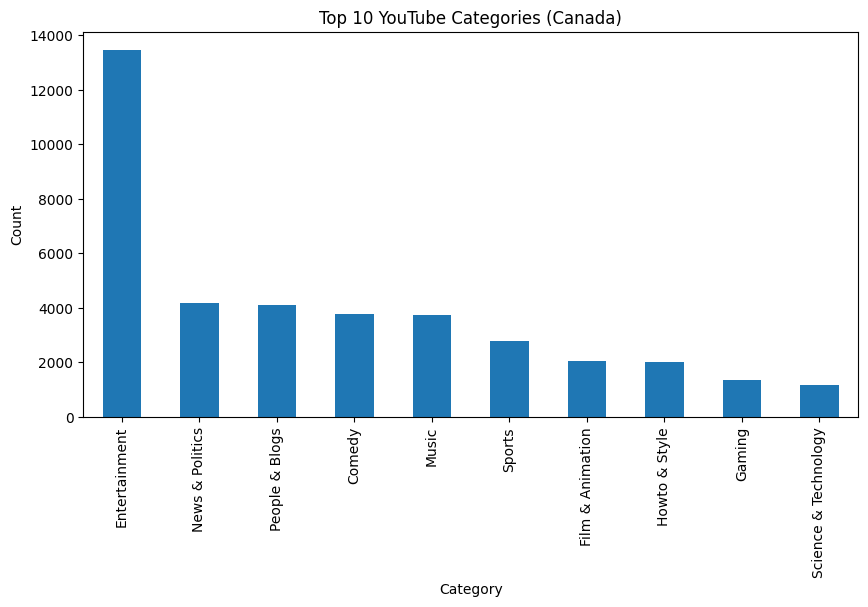

In [20]:
import matplotlib.pyplot as plt

# Top categories
df['category_name'].value_counts().head(10).plot(kind='bar', figsize=(10,5))
plt.title("Top 10 YouTube Categories (Canada)")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()
